In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

1. caricare i dati in un dataframe

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. visualizzare i dati

In [ ]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.count()

S.no.                      404
Name of the show           393
Year of release            393
No of seasons available    393
Language                   393
Genre                      393
IMDb rating                182
Age of viewers             393
dtype: int64

3. eliminare dal dataframe tutti i record con valori NaN

In [ ]:
df.dropna(inplace=True)
df.count()

S.no.                      182
Name of the show           182
Year of release            182
No of seasons available    182
Language                   182
Genre                      182
IMDb rating                182
Age of viewers             182
dtype: int64

4. calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero

In [ ]:
df.groupby("Language")["Name of the show"].count().sort_values(ascending=False)

Language
English     155
Hindi        17
Japanese      7
Suomi         1
Spanish       1
Deutsch       1
Name: Name of the show, dtype: int64

5. visualizzare il grafico a barre verticali dei dati precedenti

In [ ]:
df2 = df.groupby("Language")["Name of the show"].count().sort_values(ascending=False)
df2

Language
English     155
Hindi        17
Japanese      7
Suomi         1
Spanish       1
Deutsch       1
Name: Name of the show, dtype: int64

<BarContainer object of 6 artists>

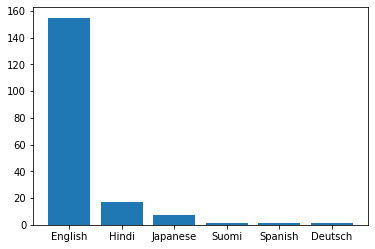

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.bar(df2.index,df2.values)

6. visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta

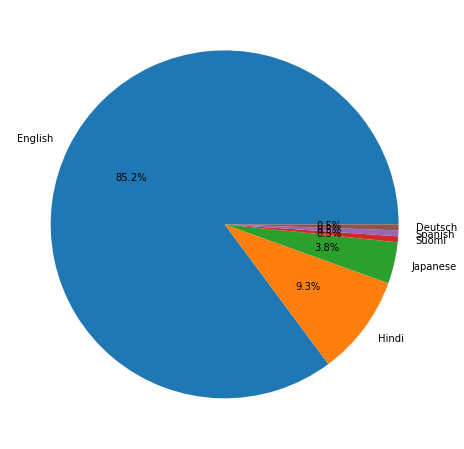

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.pie(df2.values,labels=df2.index,autopct='%1.1f%%')
plt.show()

7. creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'

In [ ]:
df3 = df
df3.loc[df3["Language"] != "English","Language"] = "non English"
df3

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


8. visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni (vedi grafico allegato come esempio)

Text(0.5, 0, '')

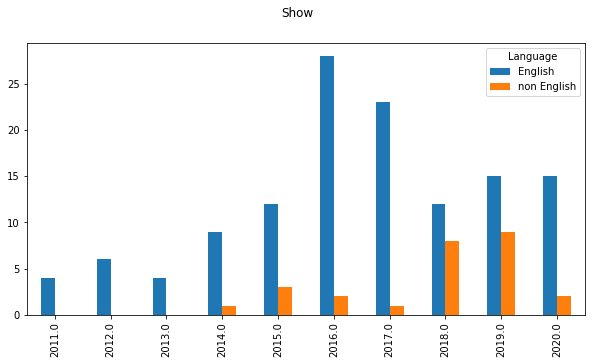

In [ ]:
from datetime import datetime
df3[df3["Year of release"] >= datetime.now().year - 10].groupby("Language")["Year of release"].value_counts().unstack(0).plot.bar()
plt.suptitle("Show")
plt.xlabel("")
